### Loading Data

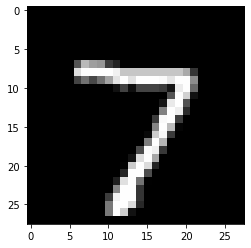

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


# Reading The Train Set
train_images_file = open('./t10k-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('./train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open('./t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('./t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))


# Plotting an image
show_image(train_set[0][0])
plt.show()

### Feed Forward Output Calculation

In [2]:
import numpy as np
from sklearn import datasets
import tensorflow as tf

In [3]:
import pandas as pd
test_set_df = pd.DataFrame(test_set)
train_set_df = pd.DataFrame(train_set)

train_data = train_set_df[0].to_numpy()
test_data = test_set_df[0].to_numpy()

train_label = train_set_df[1].to_numpy()
test_label = test_set_df[1].to_numpy()

In [4]:
test_data = (test_data/255)
train_data = (train_data/255)

In [5]:
def shuffledData(a, b):
    if len(a) == len(b):
      p = np.random.permutation(len(a))
    return (a[p], b[p])


test_data , test_label = shuffledData(test_data, test_label)
train_data , train_label = shuffledData(train_data, train_label)

In [5]:
def initialize():
    w0 = np.random.normal(size=(16, 784))
    w1 = np.random.normal(size=(16, 16))
    w2 = np.random.normal(size=(10, 16))
    b0 = np.zeros((16, 1))
    b1 = np.zeros((16, 1))
    b2 = np.zeros((10, 1))
    w = [w0, w1, w2]
    b = [b0, b1, b2]

    return w, b

In [6]:
def sigmoid(x):    
    return 1 /(1 + (np.exp(-1 * x)))

def d_sigmoid(x):    
    return sigmoid(x)/(1.0 - sigmoid(x))   

In [9]:
w, b = initialize()

def get_max(m):
    maximum = -99999
    index = 0
    for i in range(len(m)):
        if m[i] > maximum:
            maximum = m[i]
            index = i
    return index


def feedforward(weight0, weight1, weight2, bias0, bias1, bias2):
    counter = 0
    for i in range (100):
        #activation function is sigmoid
        new_data = train_data[i].reshape(-1, 1)
        sigmoid_y = sigmoid(weight0 @ new_data + bias0)
        sigmoid_z = sigmoid(weight1 @ sigmoid_y + bias1)
        sigmoid_c = sigmoid(weight2 @ sigmoid_z + bias2)

        if get_max(sigmoid_c) == get_max(train_label[i]):
            counter = counter + 1
    return (float)((counter/100) * 100)

output_accuracy = 0

for j in range(20):
    output_accuracy += feedforward(w[0], w[1], w[2], b[0], b[1], b[2])

print("Avarage accuracy of feedforward would be: " + str((float)(output_accuracy / 20)) + "%")


Avarage accuracy of feedforward would be: 13.0%


### Backpropagation Implimentaion

In [10]:
def initialize():
    w1 = np.random.normal(size=(16, 784))
    w2 = np.random.normal(size=(16, 16))
    w3 = np.random.normal(size=(10, 16))
    b1 = np.zeros((16, 1))
    b2 = np.zeros((16, 1))
    b3 = np.zeros((10, 1))
    w = [w1, w2, w3]
    b = [b1, b2, b3]

    return w, b

In [13]:
import math

def sigmoid(x):    
    return 1 /(1 + (np.exp(-1 * x)))

def d_sigmoid(x):    
    return sigmoid(x) * (1.0 - sigmoid(x))  

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

# def accuracy(y_pred, y_true):
#     acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
#     return acc.mean()
    
def shuffledData(a, b):
    if len(a) == len(b):
      p = np.random.permutation(len(a))
    return (a[p], b[p])

def accuracy(m):
    return np.where(m == max(m))

In [12]:
# Hyperparameters
epochs = 20
learning_rate = 1
batch_size = 10
N = 100

Accuracy: 36.0 %
Runtime: 95.2172601222992 seconds


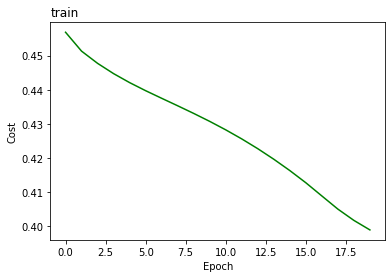

In [13]:
import pandas as pd
import time

w, b = initialize()
costs = list()

def backpropagation(w1, w2, w3, b1, b2, b3, epochs, batch_size, learning_rate, N):
    start = time.time()
    results = pd.DataFrame(columns=["mse", "accuracy"])
    batches = [train_set[i : i + batch_size] for i in range(0, N, batch_size)]
    
    for epoch in range(epochs):
        'TODO: shuffling'
        # shuffle = np.random.permutation(len(train_set))
        # print(shuffle)
        # train_set1 = np.asarray(train_set)
        # new_train_set = np.zeros((10000, ))
        # np.take(train_set1, np.random.permutation(train_set1.shape[0]), axis = 0, out = new_train_set)
        # print(type(train_set))
        # new_train_set = (list)(np.random.shuffle(train_set))
        
        for id, batch in enumerate(batches):
            # print(id)
            # print(np.shape(batch))
            grad_w1 = np.zeros((16 * 784))
            grad_w2 = np.zeros((16 * 16))
            grad_w3 = np.zeros((10, 16))
            grad_b1 = np.zeros((16, 1))
            grad_b2 = np.zeros((16, 1))
            grad_b3 = np.zeros((10, 1))

            for image, label in batch:
                ''' Feedforward '''
                net_h1 = w1 @ image + b1
                out_h1 = sigmoid(net_h1)
                net_h2 = w2 @ out_h1 + b2
                out_h2 = sigmoid(net_h2)
                net_h3 = w3 @ out_h2 + b3
                out_h3 = sigmoid(net_h3)

                ''' Backpropagation '''
                ''' output layer : d_E_total / d_w3 = (d_E_total / d_out_h3) * (d_out_h3 / d_net_h3) * (d_net_h3 / d_w3) '''
                for i in range(10):
                    for j in range(16):
                        grad_w3[i, j] += out_h2[j, 0] * d_sigmoid(net_h3[i, 0]) * 2 * (out_h3[i, 0] - label[i, 0])
                        
                for i in range(10): 
                    grad_b3[i, 0] += d_sigmoid(net_h3[i, 0]) * 2 * (out_h3[i, 0] - label[i, 0])

                ''' third layer : d_E_total / d_w2 = (d_E_total / d_out_h3) * (d_out_h3/ d_out_h2) * (d_out_h2 / d_net_h2) * (d_net_h2 / d_w2)'''
                grad_out_h3 = np.zeros((16, 1))
                for i in range(16):
                    for j in range(10):
                        grad_out_h3[i, 0] += w3[j, i] * d_sigmoid(net_h3[j, 0]) * 2 * (out_h3[j, 0] - label[j, 0]) 
                                
                grad_w2 = grad_w2.reshape(16, 16)
                for x in range(16):
                    for y in range(16): 
                        grad_w2[x, y] += grad_out_h3[x, 0] * out_h1[y, 0] * d_sigmoid(net_h2[x, 0]) 
                        
                for x in range(16):
                    grad_b2[x, 0] += d_sigmoid(net_h2[x, 0]) * grad_out_h3[x, 0] 
                        
                ''' second layer'''
                grad_out_h2 = np.zeros((16, 1))
                for m in range(16):
                    for k in range(16):
                        grad_out_h2[m, 0] += w2[k, m] * grad_out_h3[k, 0] * d_sigmoid(net_h2[k, 0])

                grad_w1 = grad_w1.reshape(16, 784)
                for x in range(16):
                    for y in range(748):
                        grad_w1[x, y] += grad_out_h2[x, 0] * d_sigmoid(net_h2[x, 0]) * image[y, 0]
                
                for x in range(16):
                    grad_b1[x, 0] += d_sigmoid(net_h2[x, 0]) * grad_out_h2[x, 0]
                
            ''' update the weights '''
            w3 -= (learning_rate * (grad_w3 / batch_size))
            w2 -= (learning_rate * (grad_w2 / batch_size))
            w1 -= (learning_rate * (grad_w1 / batch_size))
            
            ''' update the biases '''
            b3 -= (learning_rate * (grad_b3 / batch_size))
            b2 -= (learning_rate * (grad_b2 / batch_size))
            b1 -= (learning_rate * (grad_b1 / batch_size))
        
        ''' Calculating cost '''
        cost = 0
        correct_guess = 0
        for train_data in train_set[:100]:
            x0 = train_data[0]
            outh1 = sigmoid(w1 @ x0 + b1)
            outh2 = sigmoid(w2 @ outh1 + b2)
            outh3 = sigmoid(w3 @ outh2 + b3)
    
            if accuracy(outh3) == accuracy(train_data[1]):
                correct_guess =  correct_guess + 1

            # Compute cost
            for j in range(0, 10):
                cost = cost + ((outh3[j, 0] - train_data[1][j, 0]) ** 2)/2
        costs.append(cost / 100) 

    stop = time.time()
    epoch_size = [i for i in range(0, epochs)]
    # plt.plot(epoch_size, , "r")
    plt.plot(epoch_size, costs, "g")
    plt.title("train", loc = 'left')
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    print(f"Accuracy: {str( (float) (correct_guess / N) * 100)} %")
    print(f"Runtime: {stop - start} seconds")

backpropagation(w[0], w[1], w[2], b[0], b[1], b[2], epochs, batch_size, learning_rate, N)

### Vectorization

In [11]:
# Hyperparameters
epochs = 200
learning_rate = 1
batch_size = 10
N = 100

In [10]:
def initialize():
    w1 = np.random.normal(size=(16, 784))
    w2 = np.random.normal(size=(16, 16))
    w3 = np.random.normal(size=(10, 16))
    b1 = np.zeros((16, 1))
    b2 = np.zeros((16, 1))
    b3 = np.zeros((10, 1))
    w = [w1, w2, w3]
    b = [b1, b2, b3]

    return w, b

In [171]:
def guess(m):
    maximum = -99999
    index = 0
    for i in range(len(m)):
        if m[i] > maximum:
            maximum = m[i]
            index = i
    return index

Accuracy: 82.0 %
Runtime: 4.2679603099823 seconds


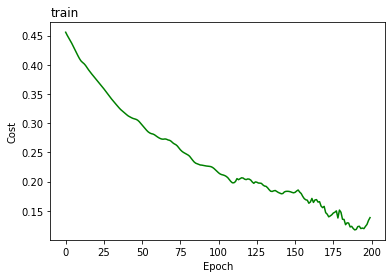

In [15]:
import pandas as pd
import time

w, b = initialize()
costs = list()
acc = list()

def vectorized_backpropagation(w1, w2, w3, b1, b2, b3, epochs, batch_size, learning_rate, N):
    start = time.time()
    batches = [train_set[i : i + batch_size] for i in range(0, N, batch_size)]
    
    for epoch in range(epochs):
        for id, batch in enumerate(batches):
            grad_w1 = np.zeros((16 * 784))
            grad_w2 = np.zeros((16 * 16))
            grad_w3 = np.zeros((10, 16))
            grad_b1 = np.zeros((16, 1))
            grad_b2 = np.zeros((16, 1))
            grad_b3 = np.zeros((10, 1))

            for image, label in batch:
                ''' Feedforward '''
                net_h1 = w1 @ image + b1
                out_h1 = sigmoid(net_h1)
                net_h2 = w2 @ out_h1 + b2
                out_h2 = sigmoid(net_h2)
                net_h3 = w3 @ out_h2 + b3
                out_h3 = sigmoid(net_h3)

                ''' Backpropagation '''
                ''' output layer : d_E_total / d_w3 = (d_E_total / d_out_h3) * (d_out_h3 / d_net_h3) * (d_net_h3 / d_w3) '''
                
                grad_w3 += (2 * d_sigmoid(net_h3) * (out_h3- label)) @ np.transpose(out_h2)
                grad_b3 += (2 * d_sigmoid(net_h3) * (out_h3 - label))

                ''' third layer : d_E_total / d_w2 = (d_E_total / d_out_h3) * (d_out_h3/ d_out_h2) * (d_out_h2 / d_net_h2) * (d_net_h2 / d_w2)'''
                grad_out_h3 = np.zeros((16, 1))
                grad_out_h3 += np.transpose(w3) @ (2 * d_sigmoid(net_h3) * (out_h3 - label)) 
                              
                grad_w2 = grad_w2.reshape(16, 16)
                grad_w2 += (d_sigmoid(net_h2) * grad_out_h3) @ np.transpose(out_h1)
                        
                grad_b2 += d_sigmoid(net_h2) * grad_out_h3
                        
                ''' second layer'''
                grad_out_h2 = np.zeros((16, 1))
                grad_out_h2 += np.transpose(w2) @ (d_sigmoid(net_h2) * grad_out_h3)

                grad_w1 = grad_w1.reshape(16, 784)
                grad_w1 += grad_out_h2 * d_sigmoid(net_h2) * np.transpose(image)
                
                grad_b1 += (d_sigmoid(net_h2) * grad_out_h2)
                
            ''' update the weights '''
            w3 -= (learning_rate * (grad_w3 / batch_size))
            w2 -= (learning_rate * (grad_w2 / batch_size))
            w1 -= (learning_rate * (grad_w1 / batch_size))
            # print(f"w3 is equal to {w3}\n w2 is: {w2}, \nand w1 is: {w1}")
            
            ''' update the biases '''
            b3 -= (learning_rate * (grad_b3 / batch_size))
            b2 -= (learning_rate * (grad_b2 / batch_size))
            b1 -= (learning_rate * (grad_b1 / batch_size))
            # print(f"b3 : {b3},\n b2:{b2},\n b1:{b1}")
        
        ''' Calculating cost '''
        cost = 0
        correct_guess = 0
        for train_data in train_set[:N]:
            x0 = train_data[0]
            outh1 = sigmoid(w1 @ x0 + b1)
            outh2 = sigmoid(w2 @ outh1 + b2)
            outh3 = sigmoid(w3 @ outh2 + b3)
    
            if accuracy(outh3) == accuracy(train_data[1]):
                correct_guess =  correct_guess + 1

            # Compute cost
            for i in range(0, 10):
                cost = cost + ((outh3[i, 0] - train_data[1][i, 0]) ** 2)/2
        costs.append(cost / N) 

    stop = time.time()
    epoch_size = [i for i in range(0, epochs)]
    # plt.plot(epoch_size, , "r")
    plt.plot(epoch_size, costs, "g")
    # plt.plot(epoch_size, acc, "r")
    plt.title("train", loc = 'left')
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    print(f"Accuracy: {str( (float) (correct_guess / N) * 100)} %")
    # print(f"Accuracy: {str( (float) (counter / N) * 100)} %")

    print(f"Runtime: {stop - start} seconds")

vectorized_backpropagation(w[0], w[1], w[2], b[0], b[1], b[2], epochs, batch_size, learning_rate, N)

### Test Model

In [53]:
# hyperparameters 
epochs = 5
learning_rate = 1
batch_size = 50
N = len(test_set)
print(N)

10000


### Vectorization


Accuracy of train: 10.13 %
Accuracy of test: 12.27 %
Runtime: 13.332035303115845 seconds


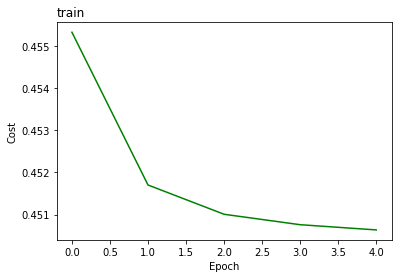

In [57]:
import pandas as pd
import time

w, b = initialize()
costs = list()

def vectorized_backpropagation(w1, w2, w3, b1, b2, b3, epochs, batch_size, learning_rate, N):
    start = time.time()
    
    for epoch in range(epochs):
        # shuffled_train_set = np.asarray(np.random.shuffle(train_set_df.values)).r
        batches = [train_set[i : i + batch_size] for i in range(0, N, batch_size)]
        for id, batch in enumerate(batches):
            grad_w1 = np.zeros((16 * 784))
            grad_w2 = np.zeros((16 * 16))
            grad_w3 = np.zeros((10, 16))
            grad_b1 = np.zeros((16, 1))
            grad_b2 = np.zeros((16, 1))
            grad_b3 = np.zeros((10, 1))

            for image, label in batch:
                ''' Feedforward '''
                net_h1 = w1 @ image + b1
                out_h1 = sigmoid(net_h1)
                net_h2 = w2 @ out_h1 + b2
                out_h2 = sigmoid(net_h2)
                net_h3 = w3 @ out_h2 + b3
                out_h3 = sigmoid(net_h3)

                ''' Backpropagation '''
                ''' output layer : d_E_total / d_w3 = (d_E_total / d_out_h3) * (d_out_h3 / d_net_h3) * (d_net_h3 / d_w3) '''
                
                grad_w3 += (2 * d_sigmoid(net_h3) * (out_h3- label)) @ np.transpose(out_h2)
                grad_b3 += (2 * d_sigmoid(net_h3) * (out_h3 - label))

                ''' third layer : d_E_total / d_w2 = (d_E_total / d_out_h3) * (d_out_h3/ d_out_h2) * (d_out_h2 / d_net_h2) * (d_net_h2 / d_w2)'''
                grad_out_h3 = np.zeros((16, 1))
                grad_out_h3 += np.transpose(w3) @ (2 * d_sigmoid(net_h3) * (out_h3 - label)) 
                              
                grad_w2 = grad_w2.reshape(16, 16)
                grad_w2 += (d_sigmoid(net_h2) * grad_out_h3) @ np.transpose(out_h1)
                        
                grad_b2 += d_sigmoid(net_h2) * grad_out_h3
                        
                ''' second layer'''
                grad_out_h2 = np.zeros((16, 1))
                grad_out_h2 += np.transpose(w2) @ (d_sigmoid(net_h2) * grad_out_h3)

                grad_w1 = grad_w1.reshape(16, 784)
                grad_w1 += grad_out_h2 * d_sigmoid(net_h2) * np.transpose(image)
                
                grad_b1 += (d_sigmoid(net_h2) * grad_out_h2)
                
            ''' update the weights '''
            w3 -= (learning_rate * (grad_w3 / batch_size))
            w2 -= (learning_rate * (grad_w2 / batch_size))
            w1 -= (learning_rate * (grad_w1 / batch_size))
            # print(f"w3 is equal to {w3}\n w2 is: {w2}, \nand w1 is: {w1}")
            
            ''' update the biases '''
            b3 -= (learning_rate * (grad_b3 / batch_size))
            b2 -= (learning_rate * (grad_b2 / batch_size))
            b1 -= (learning_rate * (grad_b1 / batch_size))
            # print(f"b3 : {b3},\n b2:{b2},\n b1:{b1}")

        ' Testing the model '
        counter = 0 
        for test_data in test_set[:N]:
            x0 = test_data[0]
            outh1 = sigmoid(w1 @ x0 + b1)
            outh2 = sigmoid(w2 @ outh1 + b2)
            outh3 = sigmoid(w3 @ outh2 + b3)
        
            if accuracy(outh3) == accuracy(test_data[1]):
                counter =  counter + 1 

        ''' Calculating cost '''
        cost = 0
        correct_guess = 0
        for train_data in train_set[:N]:
            x0 = train_data[0]
            outh1 = sigmoid(w1 @ x0 + b1)
            outh2 = sigmoid(w2 @ outh1 + b2)
            outh3 = sigmoid(w3 @ outh2 + b3)
    
            if accuracy(outh3) == accuracy(train_data[1]):
                correct_guess =  correct_guess + 1

            # Compute cost
            for j in range(0, 10):
                cost = cost + ((outh3[j, 0] - train_data[1][j, 0]) ** 2) / 2
        costs.append(cost / N)     

    stop = time.time()
    epoch_size = [i for i in range(0, epochs)]
    # plt.plot(epoch_size, , "r")
    plt.plot(epoch_size, costs, "g")
    plt.title("train", loc = 'left')
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    print(f"Accuracy of train: {str( (float) (correct_guess / N) * 100)} %")
    print(f"Accuracy of test: {str(((float) (counter / N)) * 100)} %")    

    print(f"Runtime: {stop - start} seconds")

vectorized_backpropagation(w[0], w[1], w[2], b[0], b[1], b[2], epochs, batch_size, learning_rate, N)